# ***BOTHO DRIVING***

Date: 1 December 2025

By: Nan Masters from ALX

***1. INTRODUCTION***

This project focuses on analysing driver telemetry data to understand the challenges a driver faces on different roads. We aim to identify pain points, such as sudden braking, sharp turns, or other difficult driving moments. Using this data, we want to build a model that can detect these problem areas automatically. The insights from this model can help improve road safety and driving experiences.




***2. DATASETS***

Telemetry dataset from ALTRON

Supplementary dataset from ALTRON

Our own supplementary dataset



***3. IMPORT TOOLS***

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import joblib
import os

In [133]:
import pandas as pd

# Load the parquet dataset into a pandas DataFrame
df = pd.read_parquet('/content/part-00590-tid-6661262080813627668-5b71b33c-8263-4f63-9ea0-b9e2e435cab4-130881-1.c000.snappy (9) (1).parquet')

# Display the first 5 rows of the DataFrame
display(df.head())

,sourceimei,battery_voltage_value,hardware_attached_gps_not_present,unitdatetime,eventid,latitude,longitude,altitude,speed,heading,...,distance_suburb,municipality,postal_code,province,road,road_distance_m,rough_road,roadspeed,suburb,town
0,869716067485269,12.484994,1,2025-10-08 11:24:34 PM,5E,-26.122560,28.078880,1639.0,0,80,...,0,City of Johannesburg,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg
1,869716067485269,12.845138,1,2025-10-08 03:59:49 PM,02,-26.122560,28.078880,1639.0,0,80,...,0,City of Johannesburg,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg
2,869716067485269,12.845138,1,2025-10-08 03:59:50 PM,02,-26.122560,28.078880,1639.0,0,80,...,0,City of Johannesburg,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg
3,869716067485269,12.845138,1,2025-10-08 03:59:51 PM,02,-26.122564,28.078883,1639.0,0,80,...,0,City of Johannesburg,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg
4,869716067485269,12.845138,1,2025-10-08 03:59:51 PM,00,-26.122560,28.078880,1639.0,0,80,...,0,City of Johannesburg,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg


In [134]:
df.tail()

,sourceimei,battery_voltage_value,hardware_attached_gps_not_present,unitdatetime,eventid,latitude,longitude,altitude,speed,heading,...,distance_suburb,municipality,postal_code,province,road,road_distance_m,rough_road,roadspeed,suburb,town
58421,869716067485269,14.045618,1,2025-10-01 04:48:41 AM,02,-26.122023,28.077909,1654.0,22,256,...,0,City of Johannesburg,2090,Gauteng,Kelvin Road,0,0,60,Bramley,Johannesburg
58422,869716067485269,14.045618,1,2025-10-01 04:48:42 AM,02,-26.122034,28.077855,1653.0,22,254,...,0,City of Johannesburg,2090,Gauteng,Kelvin Road,0,0,60,Bramley,Johannesburg
58423,869716067485269,14.045618,1,2025-10-01 04:48:43 AM,02,-26.122050,28.077794,1652.0,25,254,...,0,City of Johannesburg,2090,Gauteng,Kelvin Road,0,0,60,Bramley,Johannesburg
58424,869716067485269,14.045618,1,2025-10-01 04:48:49 AM,02,-26.122149,28.077339,1645.0,29,262,...,0,City of Johannesburg,2090,Gauteng,Kelvin Road,0,0,60,Bramley,Johannesburg
58425,869716067485269,12.484994,1,2025-10-01 03:50:35 AM,5E,-26.122770,28.078840,1647.0,0,0,...,0,City of Johannesburg,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg


In [135]:
df.shape

(58426, 33)

In [136]:
df.describe()

,battery_voltage_value,hardware_attached_gps_not_present,latitude,longitude,altitude,speed,heading,bearing,odometer,gforce_forward,...,gforce_up,gforce_down,gforce_left,gforce_right,classification,condition,distance_suburb,road_distance_m,rough_road,roadspeed
count,58426.000000,58426.0,58426.000000,58426.000000,58426.000000,58426.000000,58426.000000,58426.000000,58426.000000,58426.000000,...,58426.0,58426.000000,58426.000000,58426.000000,58426.000000,58426.0,58426.0,58426.0,58426.0,58426.00000
mean,13.704979,1.0,-26.099839,27.942585,1657.091466,29.428166,177.321124,177.321124,261671.663728,9.239037,...,0.0,955.319550,35.780303,4.751309,53.221528,1.0,0.0,0.0,0.0,59.96012
std,0.369365,0.0,0.027026,0.136306,84.991365,33.573539,110.858807,110.858807,162.344206,30.907752,...,0.0,117.008913,43.848121,23.432835,16.328609,0.0,0.0,0.0,0.0,32.56671
min,10.564226,1.0,-26.157793,27.747722,1447.000000,0.000000,0.000000,0.000000,261420.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,10.000000,1.0,0.0,0.0,0.0,0.00000
25%,13.685474,1.0,-26.121980,27.782270,1605.000000,0.000000,80.000000,80.000000,261515.000000,0.000000,...,0.0,950.000000,0.000000,0.000000,51.000000,1.0,0.0,0.0,0.0,60.00000
50%,13.925570,1.0,-26.103800,27.965100,1639.000000,20.000000,182.000000,182.000000,261683.000000,0.000000,...,0.0,950.000000,50.000000,0.000000,60.000000,1.0,0.0,0.0,0.0,60.00000
75%,13.925570,1.0,-26.077950,28.078819,1735.000000,51.000000,272.000000,272.000000,261809.000000,0.000000,...,0.0,1000.000000,50.000000,0.000000,60.000000,1.0,0.0,0.0,0.0,80.00000
max,14.165666,1.0,-26.033770,28.098120,1822.000000,121.000000,360.000000,360.000000,261911.000000,600.000000,...,0.0,1600.000000,450.000000,350.000000,80.000000,1.0,0.0,0.0,0.0,120.00000


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58426 entries, 0 to 58425
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   sourceimei                         58426 non-null  object 
 1   battery_voltage_value              58426 non-null  float64
 2   hardware_attached_gps_not_present  58426 non-null  int32  
 3   unitdatetime                       58426 non-null  object 
 4   eventid                            58426 non-null  object 
 5   latitude                           58426 non-null  float64
 6   longitude                          58426 non-null  float64
 7   altitude                           58426 non-null  float64
 8   speed                              58426 non-null  int32  
 9   heading                            58426 non-null  int32  
 10  bearing                            58426 non-null  int32  
 11  odometer                           58426 non-null  int

In [138]:
if 'df' not in locals() and 'df' not in globals():
    print("Error: DataFrame 'df' is not defined. Please ensure the cell loading the dataset (cell 4a46a0e3) has been executed.")
else:
    print("Categorical Columns:")
    for col in df.columns:
        if df[col].dtype == 'object':
            print(col)

Categorical Columns:
sourceimei
unitdatetime
eventid
engine_hours
closest_suburb
country
municipality
postal_code
province
road
suburb
town


In [139]:
df['sourceimei'].duplicated().sum()

np.int64(58425)

There are 58425 duplicates which are suggesting that there is a single device/source data. This strongly suggests that nearly all the data points in our DataFrame are coming from one single device or source. The sourceimei.

In [140]:
df.isnull().sum()

,0
sourceimei,0
battery_voltage_value,0
hardware_attached_gps_not_present,0
unitdatetime,0
eventid,0
latitude,0
longitude,0
altitude,0
speed,0
heading,0


In [141]:
df = df.drop(columns=['closest_suburb'])
print("Dropped 'closest_suburb' column due to all missing values.")

Dropped 'closest_suburb' column due to all missing values.


In [142]:
df.describe()

,battery_voltage_value,hardware_attached_gps_not_present,latitude,longitude,altitude,speed,heading,bearing,odometer,gforce_forward,...,gforce_up,gforce_down,gforce_left,gforce_right,classification,condition,distance_suburb,road_distance_m,rough_road,roadspeed
count,58426.000000,58426.0,58426.000000,58426.000000,58426.000000,58426.000000,58426.000000,58426.000000,58426.000000,58426.000000,...,58426.0,58426.000000,58426.000000,58426.000000,58426.000000,58426.0,58426.0,58426.0,58426.0,58426.00000
mean,13.704979,1.0,-26.099839,27.942585,1657.091466,29.428166,177.321124,177.321124,261671.663728,9.239037,...,0.0,955.319550,35.780303,4.751309,53.221528,1.0,0.0,0.0,0.0,59.96012
std,0.369365,0.0,0.027026,0.136306,84.991365,33.573539,110.858807,110.858807,162.344206,30.907752,...,0.0,117.008913,43.848121,23.432835,16.328609,0.0,0.0,0.0,0.0,32.56671
min,10.564226,1.0,-26.157793,27.747722,1447.000000,0.000000,0.000000,0.000000,261420.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,10.000000,1.0,0.0,0.0,0.0,0.00000
25%,13.685474,1.0,-26.121980,27.782270,1605.000000,0.000000,80.000000,80.000000,261515.000000,0.000000,...,0.0,950.000000,0.000000,0.000000,51.000000,1.0,0.0,0.0,0.0,60.00000
50%,13.925570,1.0,-26.103800,27.965100,1639.000000,20.000000,182.000000,182.000000,261683.000000,0.000000,...,0.0,950.000000,50.000000,0.000000,60.000000,1.0,0.0,0.0,0.0,60.00000
75%,13.925570,1.0,-26.077950,28.078819,1735.000000,51.000000,272.000000,272.000000,261809.000000,0.000000,...,0.0,1000.000000,50.000000,0.000000,60.000000,1.0,0.0,0.0,0.0,80.00000
max,14.165666,1.0,-26.033770,28.098120,1822.000000,121.000000,360.000000,360.000000,261911.000000,600.000000,...,0.0,1600.000000,450.000000,350.000000,80.000000,1.0,0.0,0.0,0.0,120.00000


main insights:


**Battery Health**

The battery_voltage_value shows a generally healthy range, though the minimum indicates some instances of lower voltage.

**Driving Behavior Indicators**

speed varies significantly, ranging from 0 km/h to 121 km/h which are our highway speeds, with an average of about 29 km/h. This suggests a mix of driving conditions.

gforce_forward, gforce_backward, gforce_left, and gforce_right has many  high values, indicating instances of hard acceleration, braking, or sharp turns. These are critical for identifying risky driving events.

**Constant Columns**

Several columns (hardware_attached_gps_not_present, condition, distance_suburb, road_distance_m, rough_road) have zero variance, meaning they contain only one unique value across the entire dataset. These columns offer no analytical value in their current state and we need to remove them because they don't serve as important identifiers or flags.

Categorical columns

In [143]:
print("Categorical Columns:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)

Categorical Columns:
sourceimei
unitdatetime
eventid
engine_hours
country
municipality
postal_code
province
road
suburb
town


In [144]:
#examining count of the data on the categorical column
categorical_cols = [
    'sourceimei',
    'unitdatetime',
    'eventid',
    'engine_hours',
    'country',
    'municipality',
    'postal_code',
    'province',
    'road',
    'suburb',
    'town'
]

for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].value_counts())



Unique values in 'sourceimei':
sourceimei
869716067485269    58426
Name: count, dtype: int64

Unique values in 'unitdatetime':
unitdatetime
2025-10-03 09:56:31 AM    4
2025-10-01 04:48:40 AM    4
2025-10-06 03:23:46 PM    4
2025-10-03 02:08:09 PM    4
2025-10-06 03:24:54 PM    3
                         ..
2025-10-04 11:42:00 AM    1
2025-10-04 11:42:01 AM    1
2025-10-04 11:42:02 AM    1
2025-10-04 11:42:03 AM    1
2025-10-04 11:42:40 AM    1
Name: count, Length: 56655, dtype: int64

Unique values in 'eventid':
eventid
02    56978
7F      432
45      281
A2      210
A1      209
44      175
00       50
01       50
C3       14
C2       13
5E        9
40        2
3A        1
AC        1
AD        1
Name: count, dtype: int64

Unique values in 'engine_hours':
engine_hours
158996    279
159183    116
158847    114
159128    114
158742    114
         ... 
159203     29
159202     21
159220     19
159201     19
159382      3
Name: count, Length: 946, dtype: int64

Unique values in 'country'

Time Column

In [145]:
df['unitdatetime'] = pd.to_datetime(df['unitdatetime'])
df['hour_of_day'] = df['unitdatetime'].dt.hour
df['day_of_week'] = df['unitdatetime'].dt.day_name()

print("First 5 entries with new time features:")
print(df[['unitdatetime', 'hour_of_day', 'day_of_week']].head())

First 5 entries with new time features:
         unitdatetime  hour_of_day day_of_week
0 2025-10-08 23:24:34           23   Wednesday
1 2025-10-08 15:59:49           15   Wednesday
2 2025-10-08 15:59:50           15   Wednesday
3 2025-10-08 15:59:51           15   Wednesday
4 2025-10-08 15:59:51           15   Wednesday


The dataset covers the period from 2025-10-01 03:50:35 to 2025-10-08 23:24:34. This means the telemetry data spans approximately 8 days in October 2025.

Numerical Coloumns

In [146]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical Columns:")
for col in numerical_cols:
    print(col)

Numerical Columns:
battery_voltage_value
hardware_attached_gps_not_present
latitude
longitude
altitude
speed
heading
bearing
odometer
gforce_forward
gforce_backward
gforce_up
gforce_down
gforce_left
gforce_right
classification
condition
distance_suburb
road_distance_m
rough_road
roadspeed
hour_of_day


In [147]:
df.describe()

,battery_voltage_value,hardware_attached_gps_not_present,unitdatetime,latitude,longitude,altitude,speed,heading,bearing,odometer,...,gforce_down,gforce_left,gforce_right,classification,condition,distance_suburb,road_distance_m,rough_road,roadspeed,hour_of_day
count,58426.000000,58426.0,58426,58426.000000,58426.000000,58426.000000,58426.000000,58426.000000,58426.000000,58426.000000,...,58426.000000,58426.000000,58426.000000,58426.000000,58426.0,58426.0,58426.0,58426.0,58426.00000,58426.000000
mean,13.704979,1.0,2025-10-04 05:17:19.084020480,-26.099839,27.942585,1657.091466,29.428166,177.321124,177.321124,261671.663728,...,955.319550,35.780303,4.751309,53.221528,1.0,0.0,0.0,0.0,59.96012,10.613528
min,10.564226,1.0,2025-10-01 03:50:35,-26.157793,27.747722,1447.000000,0.000000,0.000000,0.000000,261420.000000,...,0.000000,0.000000,0.000000,10.000000,1.0,0.0,0.0,0.0,0.00000,0.000000
25%,13.685474,1.0,2025-10-03 08:39:10.249999872,-26.121980,27.782270,1605.000000,0.000000,80.000000,80.000000,261515.000000,...,950.000000,0.000000,0.000000,51.000000,1.0,0.0,0.0,0.0,60.00000,6.000000
50%,13.925570,1.0,2025-10-04 04:46:46.500000,-26.103800,27.965100,1639.000000,20.000000,182.000000,182.000000,261683.000000,...,950.000000,50.000000,0.000000,60.000000,1.0,0.0,0.0,0.0,60.00000,10.000000
75%,13.925570,1.0,2025-10-04 16:03:50.750000128,-26.077950,28.078819,1735.000000,51.000000,272.000000,272.000000,261809.000000,...,1000.000000,50.000000,0.000000,60.000000,1.0,0.0,0.0,0.0,80.00000,15.000000
max,14.165666,1.0,2025-10-08 23:24:34,-26.033770,28.098120,1822.000000,121.000000,360.000000,360.000000,261911.000000,...,1600.000000,450.000000,350.000000,80.000000,1.0,0.0,0.0,0.0,120.00000,23.000000
std,0.369365,0.0,NaN,0.027026,0.136306,84.991365,33.573539,110.858807,110.858807,162.344206,...,117.008913,43.848121,23.432835,16.328609,0.0,0.0,0.0,0.0,32.56671,4.364829


**What are the insights?**


1. latitude & longitude

The min and max values for both latitude (-26.15 to -26.03) and longitude (27.74 to 28.09) define the geographical area covered by the vehicle's movements. This confirms the vehicle operates within a specific region (Gauteng, South Africa, as identified by categorical columns).
These are crucial for mapping the vehicle's routes, identifying frequently visited areas, and understanding geographical context of events.

2. altitude

This tells us the variations in the vehicle's elevation, which is expected during travel, especially in varied terrain.

This can give us insights on driving conditions (e.g uphill/downhill driving affecting speed or fuel consumption).

3. speed

29.43 km.h is a low average speed, suggesting a mix of urban driving, traffic, and stops, rather than continuous high-speed travel.

A high standard deviation relative to the mean shows significant variation in speed.

This is one of our primary metric for analysing driving behavior. It can be used to identify speeding, acceleration/deceleration patterns, and overall journey efficiency.

4. odometer

 A relatively small range of odometer readings (around 491 km difference). This is tellingus that the dataset covers a short period of travel.


5. gforce_forward, gforce_backward, gforce_left, gforce_right

The mean is low in these columns, which is a good thing, it shows that majority of the time there is not risky driving.

The maximum values 600, 350, 450 are critical. These represent instances of harsh acceleration (gforce_forward), hard braking (gforce_backward), or sharp turns (gforce_left, gforce_right).

These are primary indicators of potentially aggressive or unsafe driving behavior. High values signal events that contribute to wear and tear, passenger discomfort, and increased accident risk.


6. roadspeed

This represents the posted speed limit on the road where the vehicle was located.The average speed limit encountered by the vehicle is 59.
This is critical when comparing with the actual speed of the vehicle to detect speeding violations or driving within limits. It's a key feature for safety analysis.


DATA cleaning

In [148]:
df.head(7)

,sourceimei,battery_voltage_value,hardware_attached_gps_not_present,unitdatetime,eventid,latitude,longitude,altitude,speed,heading,...,postal_code,province,road,road_distance_m,rough_road,roadspeed,suburb,town,hour_of_day,day_of_week
0,869716067485269,12.484994,1,2025-10-08 23:24:34,5E,-26.122560,28.078880,1639.0,0,80,...,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg,23,Wednesday
1,869716067485269,12.845138,1,2025-10-08 15:59:49,02,-26.122560,28.078880,1639.0,0,80,...,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg,15,Wednesday
2,869716067485269,12.845138,1,2025-10-08 15:59:50,02,-26.122560,28.078880,1639.0,0,80,...,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg,15,Wednesday
3,869716067485269,12.845138,1,2025-10-08 15:59:51,02,-26.122564,28.078883,1639.0,0,80,...,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg,15,Wednesday
4,869716067485269,12.845138,1,2025-10-08 15:59:51,00,-26.122560,28.078880,1639.0,0,80,...,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg,15,Wednesday
5,869716067485269,12.845138,1,2025-10-08 15:59:45,02,-26.122550,28.078880,1639.0,0,80,...,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg,15,Wednesday
6,869716067485269,12.845138,1,2025-10-08 15:59:46,02,-26.122550,28.078880,1639.0,0,80,...,2090,Gauteng,"""""",0,0,0,Bramley,Johannesburg,15,Wednesday


In [149]:
df = df.rename(columns={
    'gforce_forward': 'harsh_acceleration',
    'gforce_backward': 'hard_braking',
    'gforce_left': 'sharp_left_turn',
    'gforce_right': 'sharp_right_turn'
})
print("G-force columns renamed successfully.")

# Display the first few rows to show the new column names
display(df[['harsh_acceleration', 'hard_braking', 'sharp_left_turn', 'sharp_right_turn']].head())

G-force columns renamed successfully.


,harsh_acceleration,hard_braking,sharp_left_turn,sharp_right_turn
0,0,50,0,0
1,0,50,0,0
2,0,50,0,0
3,0,50,0,0
4,0,50,0,0


In [150]:
# dropping coloumns

columns_to_drop = [
    'hardware_attached_gps_not_present',
    'gforce_up',
    'condition',
    'distance_suburb',
    'road_distance_m',
    'rough_road',
    'sourceimei',
    'country',
    'province'
]

# Filter out columns that do not exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_columns_to_drop:
    df = df.drop(columns=existing_columns_to_drop)
    print(f"Dropped columns: {existing_columns_to_drop}")
else:
    print("No specified columns found to drop or they were already dropped.")

print(f"DataFrame shape after dropping columns: {df.shape}")

Dropped columns: ['hardware_attached_gps_not_present', 'gforce_up', 'condition', 'distance_suburb', 'road_distance_m', 'rough_road', 'sourceimei', 'country', 'province']
DataFrame shape after dropping columns: (58426, 25)


DISTRIBUTIONS FOR CATEGORICAL

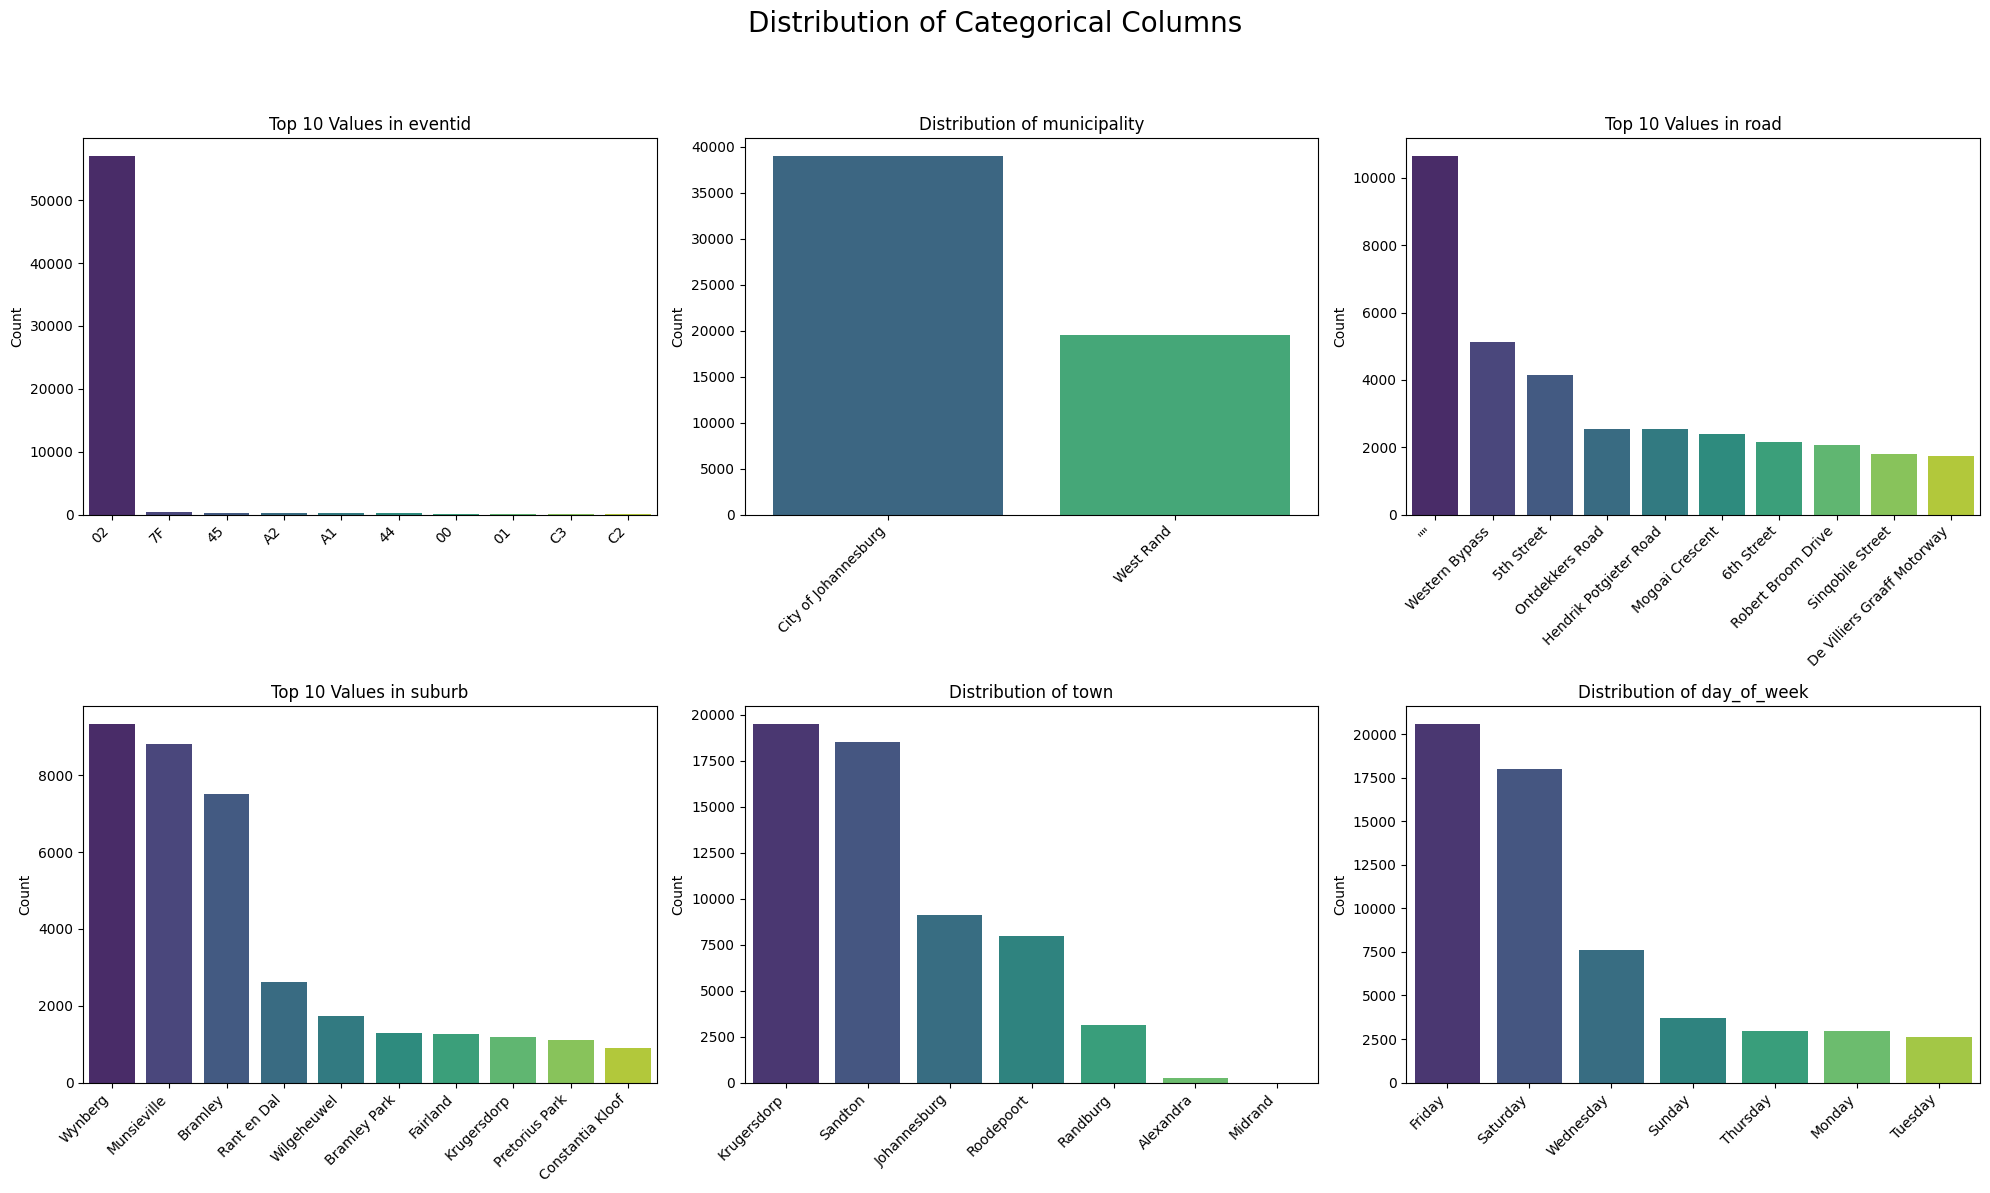

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = [
    'sourceimei',
    'eventid',
    'country',
    'municipality',
    'road',
    'suburb',
    'town',
    'day_of_week' # Include the newly created categorical column
]

# Filter out 'unitdatetime' and 'engine_hours' as unitdatetime is handled and engine_hours is pseudo-numerical
categorical_cols = [col for col in categorical_cols if col in df.columns]

# Determine grid size for subplots
num_cols = len(categorical_cols)
num_rows = (num_cols + 2) // 3  # Adjust for better layout, e.g., 3 columns per row

plt.figure(figsize=(20, 6 * num_rows))
plt.suptitle('Distribution of Categorical Columns', fontsize=20, y=1.02)

for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, 3, i + 1)

    # Skip 'sourceimei' as it only has one value
    if col == 'sourceimei':
        plt.title(f'Distribution of {col} (Single Value)')
        sns.countplot(x=[df[col].iloc[0]], color='skyblue') # Plot a single bar for the single value
        plt.ylabel('Count')
        plt.xlabel('')
        plt.xticks(rotation=45, ha='right')
        continue

    # For high cardinality columns, show top 10 values
    if df[col].nunique() > 10 and col != 'engine_hours': # 'engine_hours' is treated as a numerical feature
        top_10 = df[col].value_counts().nlargest(10)
        sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')
        plt.title(f'Top 10 Values in {col}')
        plt.ylabel('Count')
        plt.xlabel('')
        plt.xticks(rotation=45, ha='right')
    else:
        sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.ylabel('Count')
        plt.xlabel('')
        plt.xticks(rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

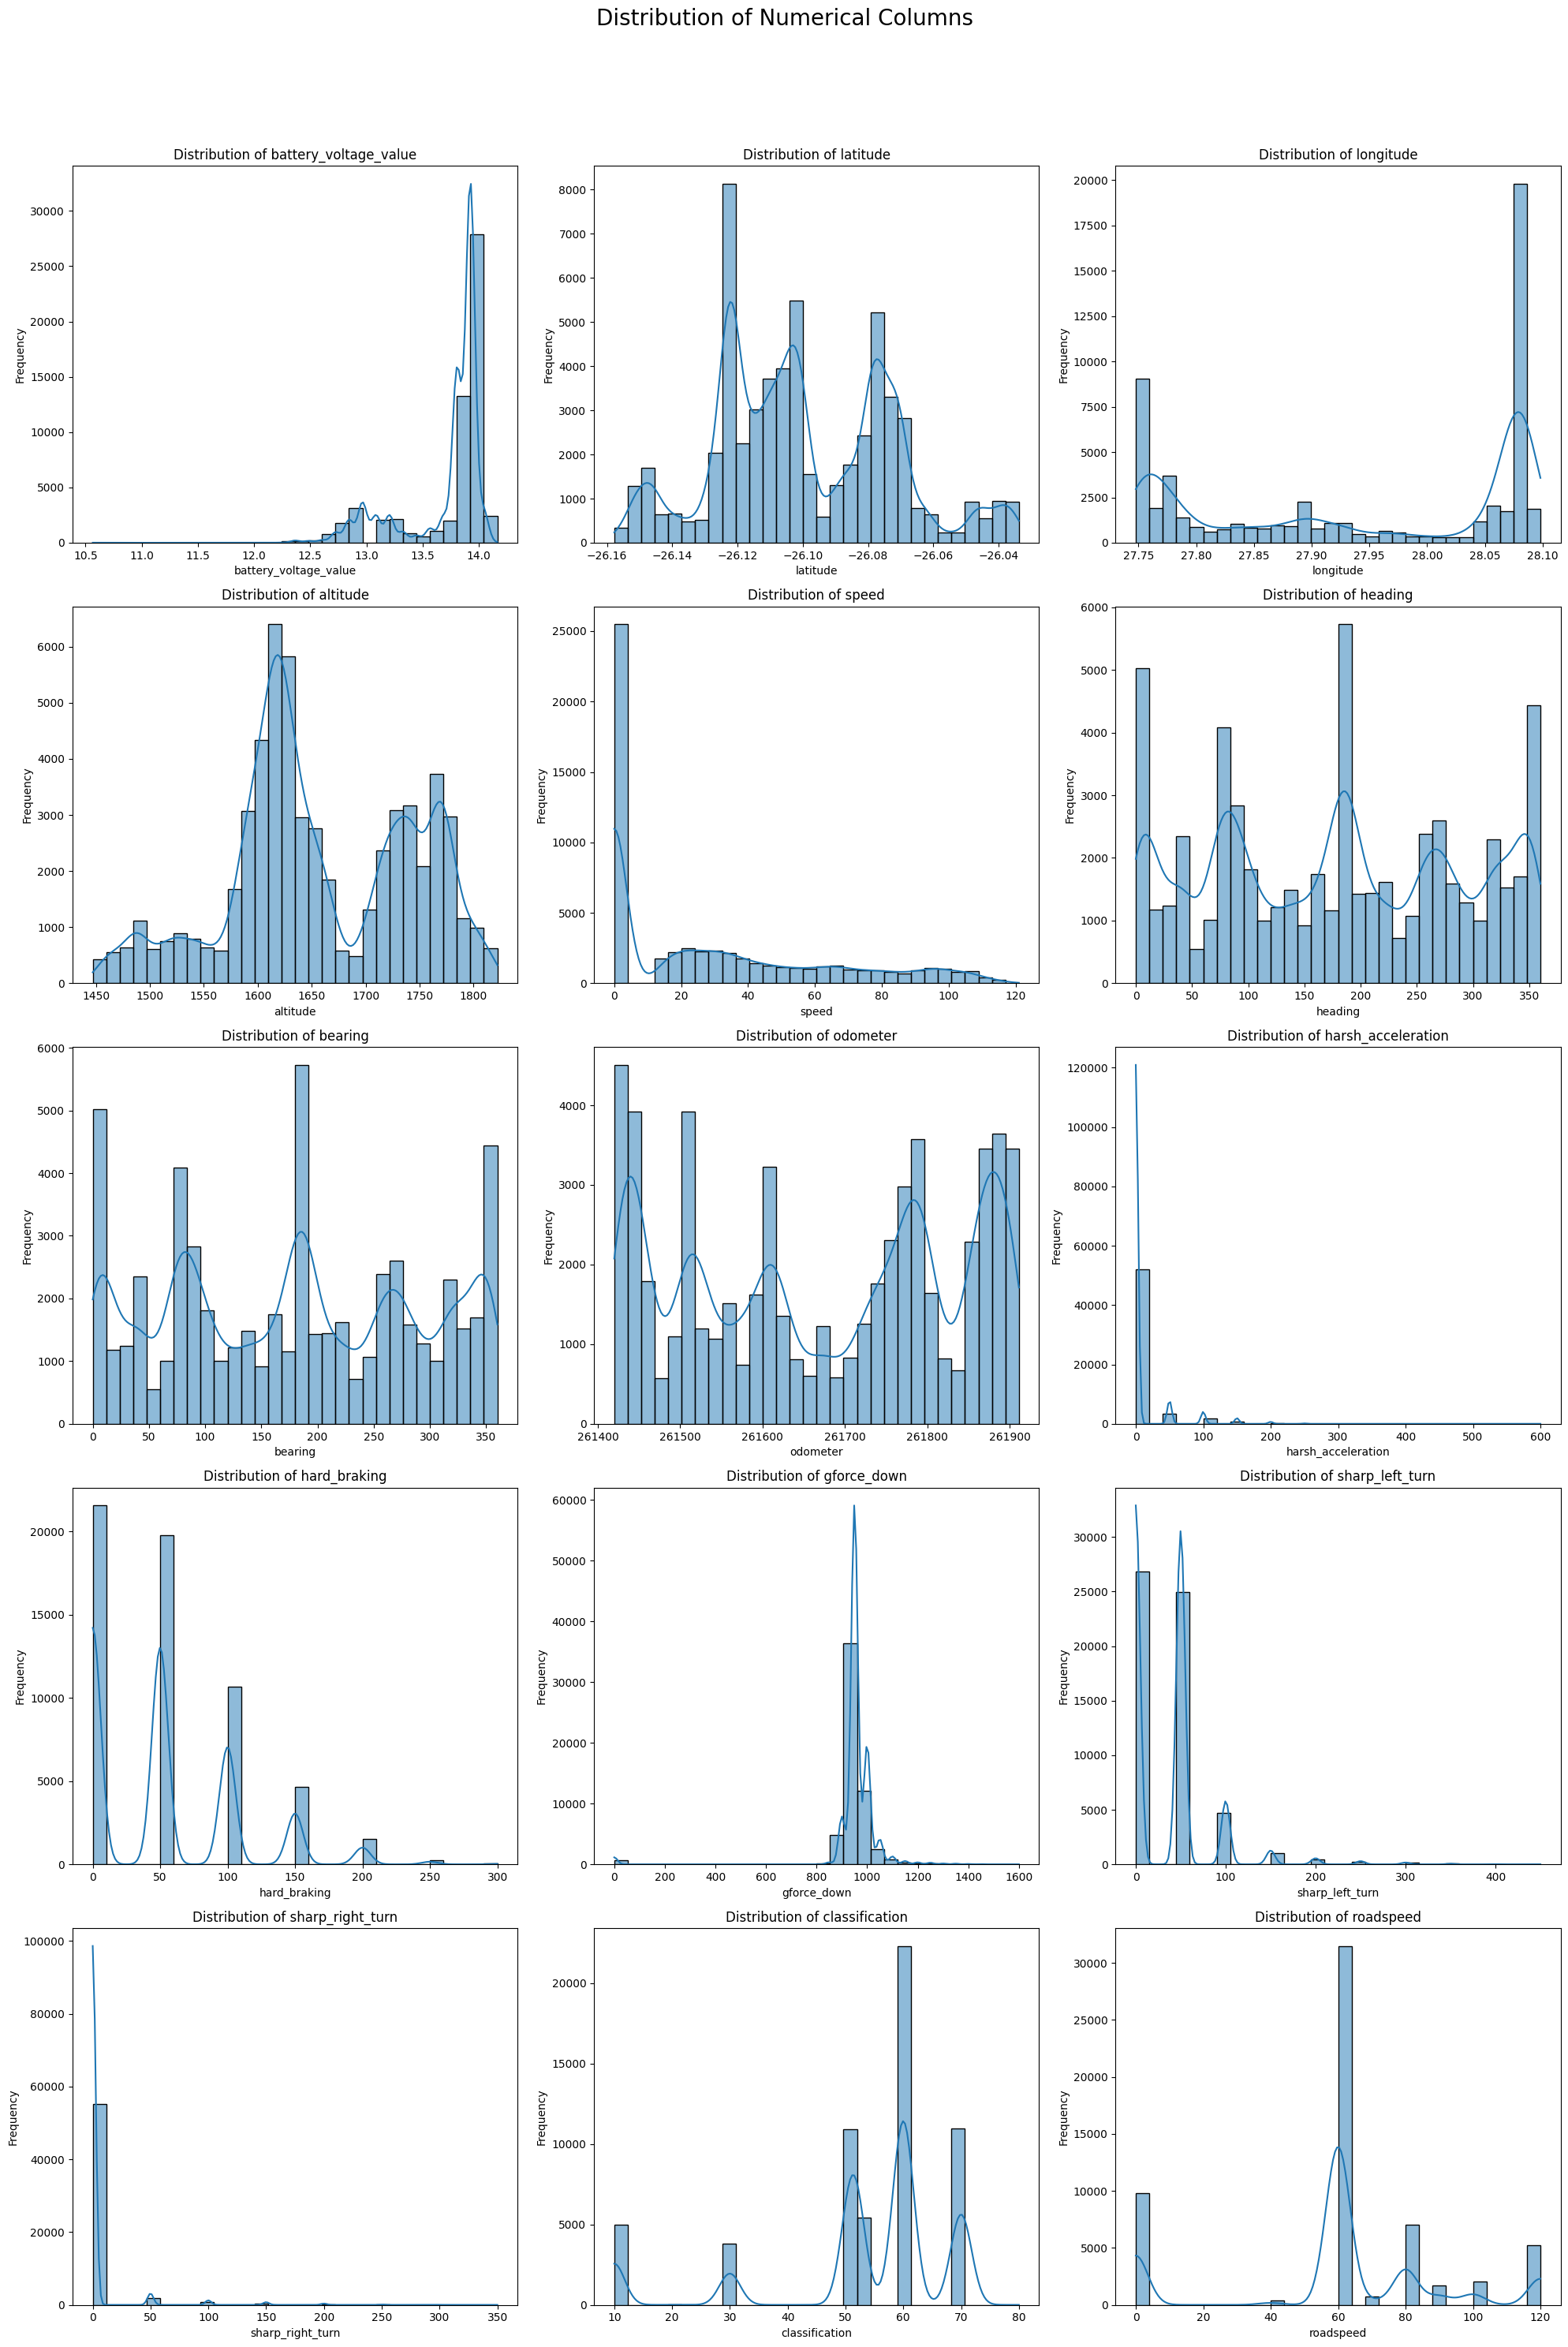

In [152]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude hour_of_day as it was already handled or can be treated as categorical for visualization
if 'hour_of_day' in numerical_cols:
    numerical_cols.remove('hour_of_day')

# Determine grid size for subplots
num_numerical_cols = len(numerical_cols)
num_rows = (num_numerical_cols + 2) // 3 # Roughly 3 columns per row

plt.figure(figsize=(20, 6 * num_rows))
plt.suptitle('Distribution of Numerical Columns', fontsize=20, y=1.02)

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

latitude & longitude
These distributions show concentrations in specific ranges, confirming that the vehicle operated within a defined geographical area, rather than traveling across vast distances.

altitude
The distribution indicates variations in elevation, with a central tendency around 1600-1700 meters. This suggests driving through varied terrain, including both flatter and more elevated areas.

speed
The speed distribution is highly skewed towards lower values, with a significant peak at 0 km/h (indicating stops) and another peak at low urban speeds. The long tail extending to 120 km/h suggests periods of highway driving. This mix is typical for a journey involving urban and possibly some highway segments.
heading & bearing: These distributions are relatively uniform across 0-360 degrees, with some possible peaks, suggesting varied driving directions rather than movement primarily along a single axis.

odometer
This column shows a narrow range of values, indicating that the dataset covers a relatively short total distance traveled by the vehicle.

harsh_acceleration, hard_braking, sharp_left_turn, sharp_right_turn
All g-force related columns are heavily concentrated at 0, which is good as it reflects normal driving behavior. However, the presence of rare, high values (visible as small spikes or tails) is crucial. These outliers are precisely the 'pain points' related to harsh driving events


classification
This appears to be an encoded categorical feature, with several distinct peaks, indicating different classifications of driving events or road types.

roadspeed
The distribution shows distinct peaks corresponding to common speed limits (e.g., 60, 80, 100, 120 km/h), indicating the varied speed limits encountered on the roads driven.

EDA

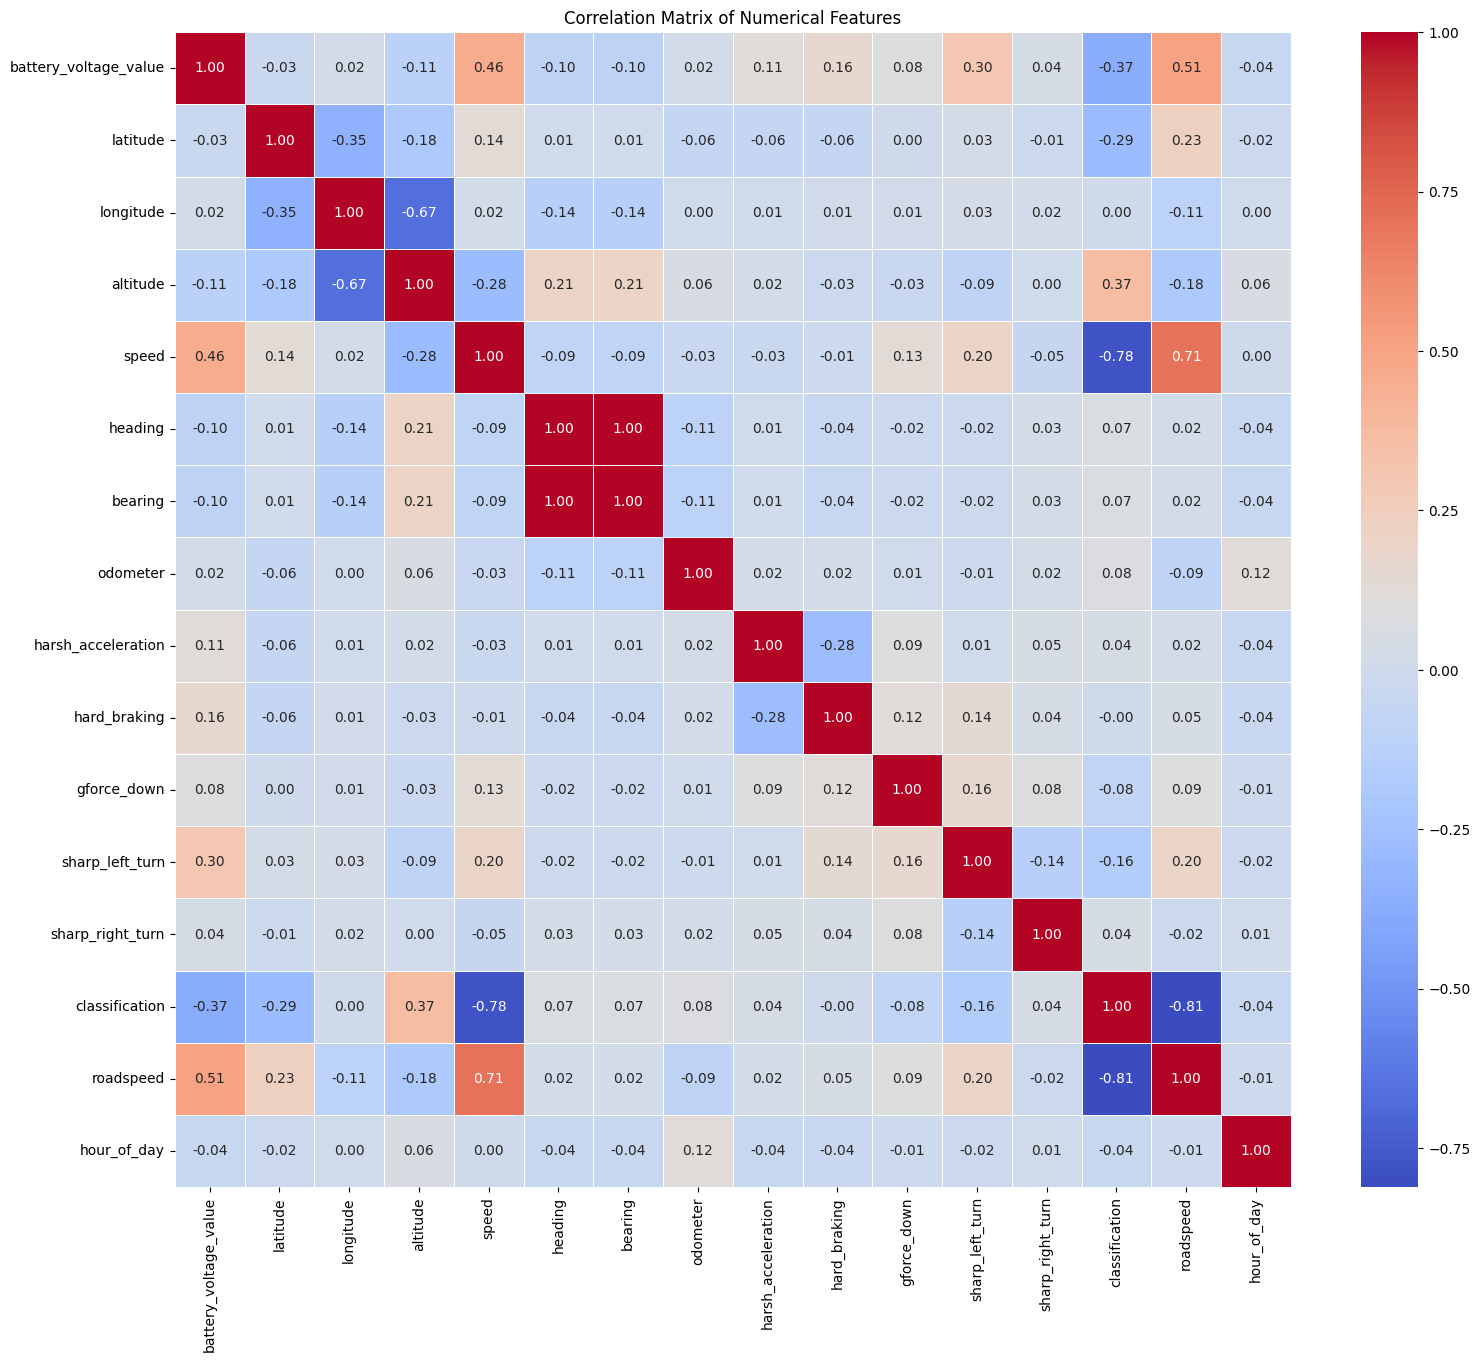

In [153]:
# Select only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Based on the bar graph of 'Top 10 Roads by Total Hard Braking Incidents', the road most impacted by hard braking is "" (the unclassified road segments). It has a total hard braking value of 488,350. This indicates that a significant amount of hard braking occurs in areas where a specific road name is not recorded.

In [154]:
unclassified_roads_data = df[df['road'] == '""']

if not unclassified_roads_data.empty:
    print("Details for unclassified roads ('""'):")
    display(unclassified_roads_data[['suburb', 'longitude', 'latitude']].head())
else:
    print("No entries found for roads named '""'.")

Details for unclassified roads (''):


,suburb,longitude,latitude
0,Bramley,28.078880,-26.122560
1,Bramley,28.078880,-26.122560
2,Bramley,28.078880,-26.122560
3,Bramley,28.078883,-26.122564
4,Bramley,28.078880,-26.122560


In [155]:
if 'unclassified_roads_data' in locals() and not unclassified_roads_data.empty:
    mean_latitude = unclassified_roads_data['latitude'].mean()
    mean_longitude = unclassified_roads_data['longitude'].mean()

    print(f"Mean Latitude for unclassified roads (''): {mean_latitude}")
    print(f"Mean Longitude for unclassified roads (''): {mean_longitude}")
else:
    print("Error: 'unclassified_roads_data' DataFrame is not defined or is empty. Please ensure the cell identifying these roads was executed correctly.")

Mean Latitude for unclassified roads (''): -26.109434676028556
Mean Longitude for unclassified roads (''): 27.995670316644752


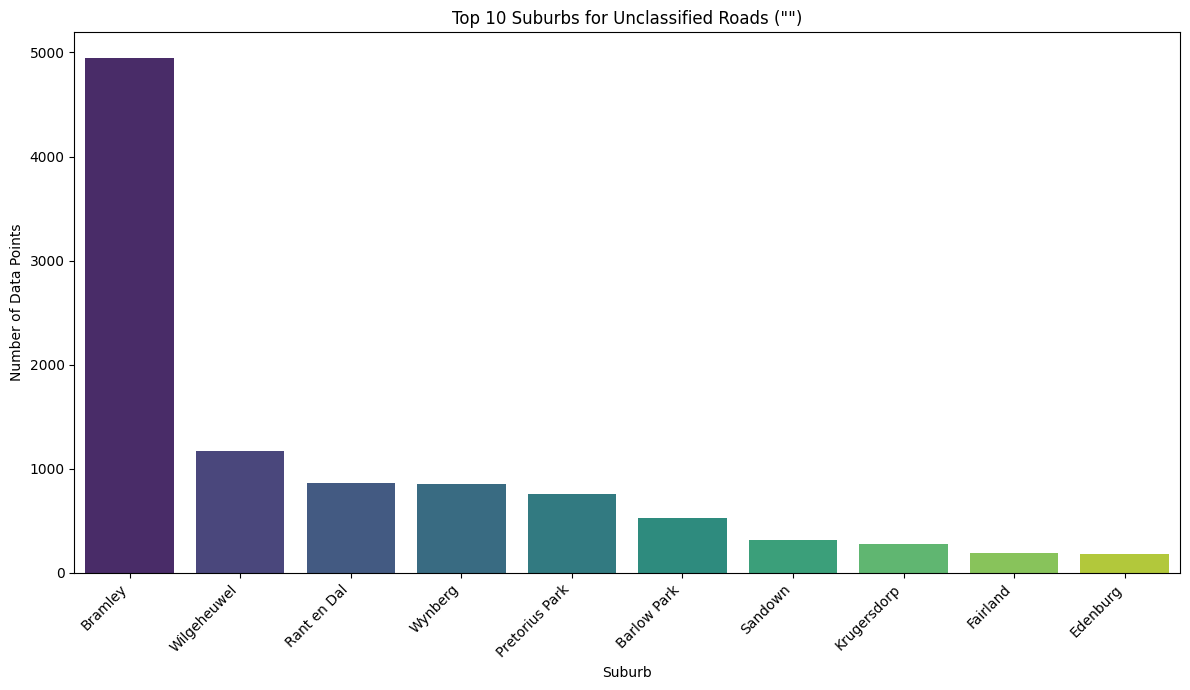

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'df' not in locals() and 'df' not in globals():
    print("Error: DataFrame 'df' is not defined. Please ensure the cells loading and preprocessing the dataset are executed.")
else:
    unclassified_roads_df = df[df['road'] == '""']

    if not unclassified_roads_df.empty:
        suburb_counts = unclassified_roads_df['suburb'].value_counts().reset_index()
        suburb_counts.columns = ['Suburb', 'Count']

        # Select top 10 suburbs for better visualization if there are too many
        top_n = 10
        if len(suburb_counts) > top_n:
            suburb_counts = suburb_counts.head(top_n)

        plt.figure(figsize=(12, 7))
        sns.barplot(x='Suburb', y='Count', data=suburb_counts, hue='Suburb', palette='viridis', legend=False)
        plt.title(f'Top {top_n} Suburbs for Unclassified Roads ("")')
        plt.xlabel('Suburb')
        plt.ylabel('Number of Data Points')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("No entries found for roads named '""'.")

This bar plot shows the distribution of the top suburbs where the unclassified roads (`""`) are most frequently recorded. It helps in understanding the geographical context of these un-named road segments.

In [157]:
if 'df' not in locals() and 'df' not in globals():
    print("Error: DataFrame 'df' is not defined. Please ensure the cells loading and preprocessing the dataset are executed.")
else:
    bramley_roads = df[df['suburb'] == 'Bramley']['road'].unique()

    if len(bramley_roads) > 0:
        print("Roads found in Bramley:")
        for road in bramley_roads:
            print(f"- {road}")
    else:
        print("No roads found for the suburb 'Bramley'.")

Roads found in Bramley:
- ""
- Kelvin Road
- Homestead Road
- High Road
- Linden Road
- Glen Road
- Eden Road
- Corlett Drive
- De Villiers Graaff Motorway
- Forest Road
- Scott Street
- Junction Road
- Rauma Avenue
- Louis Botha Avenue


In [158]:
imputation_summary = {}

# Get all unique suburbs where 'road' is '""'
suburbs_with_unclassified_roads = df[df['road'] == '""']['suburb'].unique()

print(f"Starting imputation for {len(suburbs_with_unclassified_roads)} suburbs with unclassified roads...")

for suburb in suburbs_with_unclassified_roads:
    # Get all named roads for the current suburb
    named_roads_in_suburb = df[(df['suburb'] == suburb) & (df['road'] != '""')]['road']

    if not named_roads_in_suburb.empty:
        # Find the most frequent named road in this suburb
        most_frequent_named_road = named_roads_in_suburb.mode()[0]

        # Count '""' roads in this suburb before imputation
        before_imputation_count = df[(df['suburb'] == suburb) & (df['road'] == '""')].shape[0]

        if before_imputation_count > 0:
            # Perform imputation
            df.loc[(df['suburb'] == suburb) & (df['road'] == '""'), 'road'] = most_frequent_named_road
            imputation_summary[suburb] = {
                'imputed_count': before_imputation_count,
                'imputed_with': most_frequent_named_road
            }
            print(f"  - In '{suburb}': Imputed {before_imputation_count} unclassified roads with '{most_frequent_named_road}'.")
        else:
            print(f"  - In '{suburb}': No unclassified roads ("") found to impute.")
    else:
        # If a suburb only has '""' roads, we cannot impute
        print(f"  - In '{suburb}': No named roads found to use for imputation. '""' roads remain unchanged.")

print("\nImputation complete. Summary:")
if imputation_summary:
    for suburb, details in imputation_summary.items():
        print(f"  '{suburb}': {details['imputed_count']} roads imputed with '{details['imputed_with']}'.")
else:
    print("No imputations were performed for unclassified roads.")

# Verify by checking '""' road counts again
remaining_unclassified = df[df['road'] == '""'].shape[0]
print(f"\nTotal '""' roads remaining after imputation: {remaining_unclassified}")

if remaining_unclassified > 0:
    print("Remaining unclassified roads ("") are likely in suburbs with no other named roads to use for imputation.")
    # Display some of the suburbs where '""' roads still remain
    remaining_suburbs = df[df['road'] == '""']['suburb'].unique()
    if len(remaining_suburbs) > 0:
        print(f"These are found in suburbs like: {remaining_suburbs[:5]}...")

Starting imputation for 42 suburbs with unclassified roads...
  - In 'Bramley': Imputed 4946 unclassified roads with 'Kelvin Road'.
  - In 'Bramley Park': Imputed 32 unclassified roads with 'Beryl Avenue'.
  - In 'Wynberg': Imputed 851 unclassified roads with '5th Street'.
  - In 'Eastgate': Imputed 6 unclassified roads with 'De Villiers Graaff Motorway'.
  - In 'Barlow Park': Imputed 525 unclassified roads with 'De Villiers Graaff Motorway'.
  - In 'Atholl': Imputed 6 unclassified roads with 'De Villiers Graaff Motorway'.
  - In 'Sandown': Imputed 312 unclassified roads with 'Katherine Street'.
  - In 'Sandton': Imputed 51 unclassified roads with 'Rivonia Road'.
  - In 'Sandhurst': Imputed 7 unclassified roads with 'Rivonia Road'.
  - In 'Melrose Estate': Imputed 7 unclassified roads with 'Glenhove Road'.
  - In 'Waverley': Imputed 35 unclassified roads with 'Corlett Drive'.
  - In 'Weltevredenpark Ext 1': Imputed 80 unclassified roads with '14th Avenue'.
  - In 'Constantia Kloof': Im

In [159]:
remaining_unclassified = df[df['road'] == '""'].shape[0]

if remaining_unclassified == 0:
    print("There are no unclassified roads ('""') remaining in the DataFrame after imputation.")
else:
    print("Here are the first few rows of the remaining unclassified roads:")
    display(df[df['road'] == '""'].head())

There are no unclassified roads ('') remaining in the DataFrame after imputation.


This code iterates through all unique suburbs that contain unclassified `""` road entries. For each such suburb, it identifies the most frequent *named* road and uses that name to impute the `""` entries. It provides a summary of the imputations and checks how many `""` entries remain, which would be in suburbs where no other named roads exist for contextual imputation.

In [160]:
# 1. Identify the most frequent *named* road in Bramley
bramley_df_named_roads = df[(df['suburb'] == 'Bramley') & (df['road'] != '""')]['road']

if not bramley_df_named_roads.empty:
    most_frequent_bramley_road = bramley_df_named_roads.mode()[0]
    print(f"The most frequent *named* road in Bramley is: '{most_frequent_bramley_road}'")

    # 2. Impute '""' road names within Bramley with this most frequent named road
    # We'll work on a copy to clearly show the change without altering the original df just yet,
    # or you can directly modify df if desired.
    # For this example, let's modify 'df' directly for continuity in the notebook.

    # Before imputation: count '""' roads in Bramley
    before_imputation_count = df[(df['suburb'] == 'Bramley') & (df['road'] == '""')].shape[0]
    print(f"Before imputation: {before_imputation_count} unclassified roads in Bramley.")

    df.loc[(df['suburb'] == 'Bramley') & (df['road'] == '""'), 'road'] = most_frequent_bramley_road
    print(f"Imputed {before_imputation_count} '""' road names in Bramley with '{most_frequent_bramley_road}'.")

    # After imputation: count '""' roads in Bramley
    after_imputation_count = df[(df['suburb'] == 'Bramley') & (df['road'] == '""')].shape[0]
    print(f"After imputation: {after_imputation_count} unclassified roads in Bramley remain (should be 0 for Bramley). ")

    # Display a sample of the imputed rows to verify
    print("Sample of Bramley rows, now showing imputed road name:")
    display(df[df['suburb'] == 'Bramley'][['road', 'suburb']].head(10))
else:
    print("No named roads found in Bramley to use for imputation. Cannot impute '""' roads effectively.")

The most frequent *named* road in Bramley is: 'Kelvin Road'
Before imputation: 0 unclassified roads in Bramley.
Imputed 0 '' road names in Bramley with '{most_frequent_bramley_road}'.
After imputation: 0 unclassified roads in Bramley remain (should be 0 for Bramley). 
Sample of Bramley rows, now showing imputed road name:


,road,suburb
0,Kelvin Road,Bramley
1,Kelvin Road,Bramley
2,Kelvin Road,Bramley
3,Kelvin Road,Bramley
4,Kelvin Road,Bramley
5,Kelvin Road,Bramley
6,Kelvin Road,Bramley
7,Kelvin Road,Bramley
8,Kelvin Road,Bramley
9,Kelvin Road,Bramley


This code snippet first identifies the most frequent *named* road within the 'Bramley' suburb. Then, it uses this name to replace all occurrences of `""` in the 'road' column, specifically for entries where the `suburb` is 'Bramley'. This is a form of contextual imputation, using local information to fill missing or ambiguous data points.

which roads are experiencing most harsh braking?

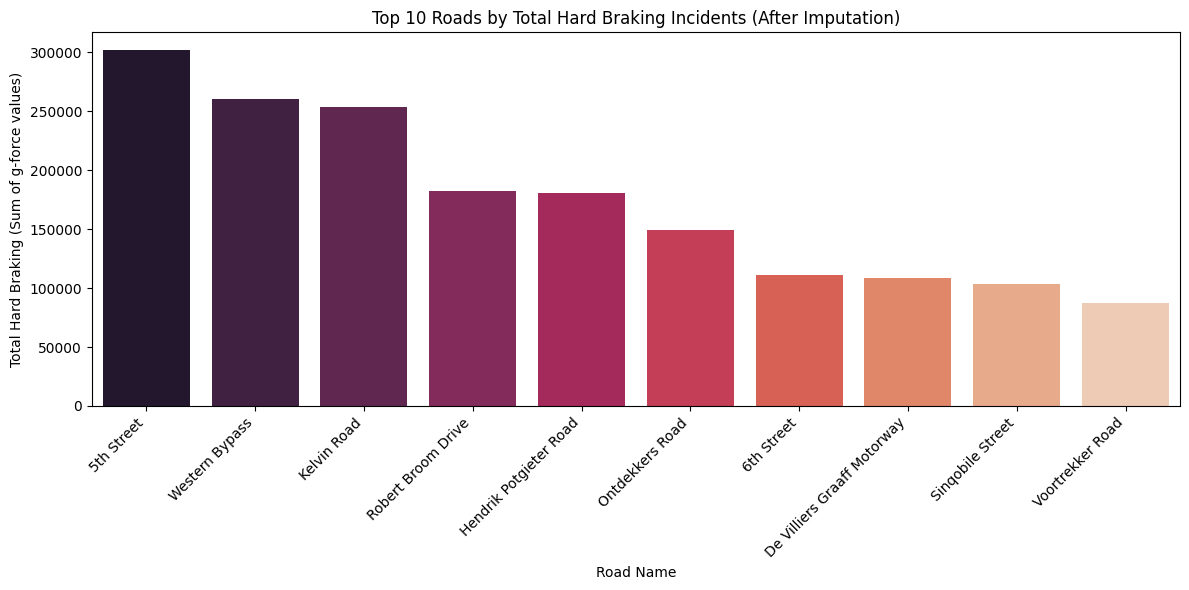

In [161]:
# Group by 'road' and sum the 'hard_braking' values
harsh_braking_by_road = df.groupby('road')['hard_braking'].sum().reset_index()

# Sort in descending order to find roads with most harsh braking, excluding empty road names
top_harsh_braking_roads = harsh_braking_by_road[harsh_braking_by_road['road'] != ''].nlargest(10, 'hard_braking')

plt.figure(figsize=(12, 6))
sns.barplot(x='road', y='hard_braking', data=top_harsh_braking_roads, hue='road', palette='rocket', legend=False)
plt.title('Top 10 Roads by Total Hard Braking Incidents (After Imputation)')
plt.xlabel('Road Name')
plt.ylabel('Total Hard Braking (Sum of g-force values)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

which roads are experiencing hard acceleration

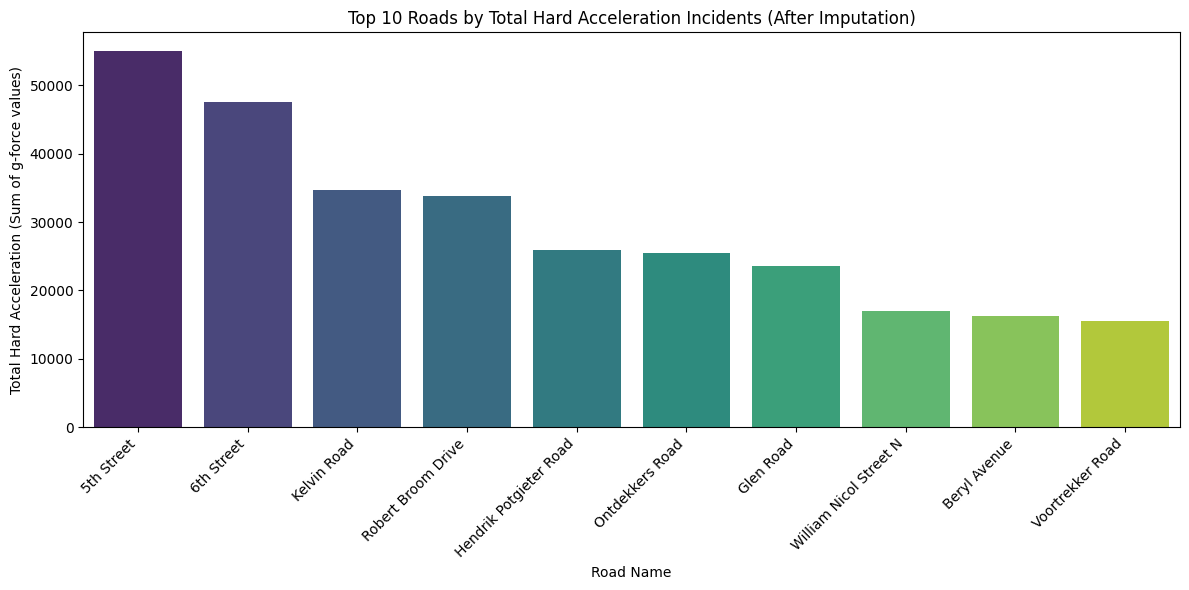

In [162]:
# Group by 'road' and sum the 'harsh_acceleration' values
harsh_acceleration_by_road = df.groupby('road')['harsh_acceleration'].sum().reset_index()

# Sort in descending order to find roads with most harsh acceleration, excluding empty road names
top_harsh_acceleration_roads = harsh_acceleration_by_road[harsh_acceleration_by_road['road'] != ''].nlargest(10, 'harsh_acceleration')

# Revert to a standard color palette without custom highlighting
plt.figure(figsize=(12, 6))
sns.barplot(x='road', y='harsh_acceleration', data=top_harsh_acceleration_roads, hue='road', palette='viridis', legend=False)
plt.title('Top 10 Roads by Total Hard Acceleration Incidents (After Imputation)')
plt.xlabel('Road Name')
plt.ylabel('Total Hard Acceleration (Sum of g-force values)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

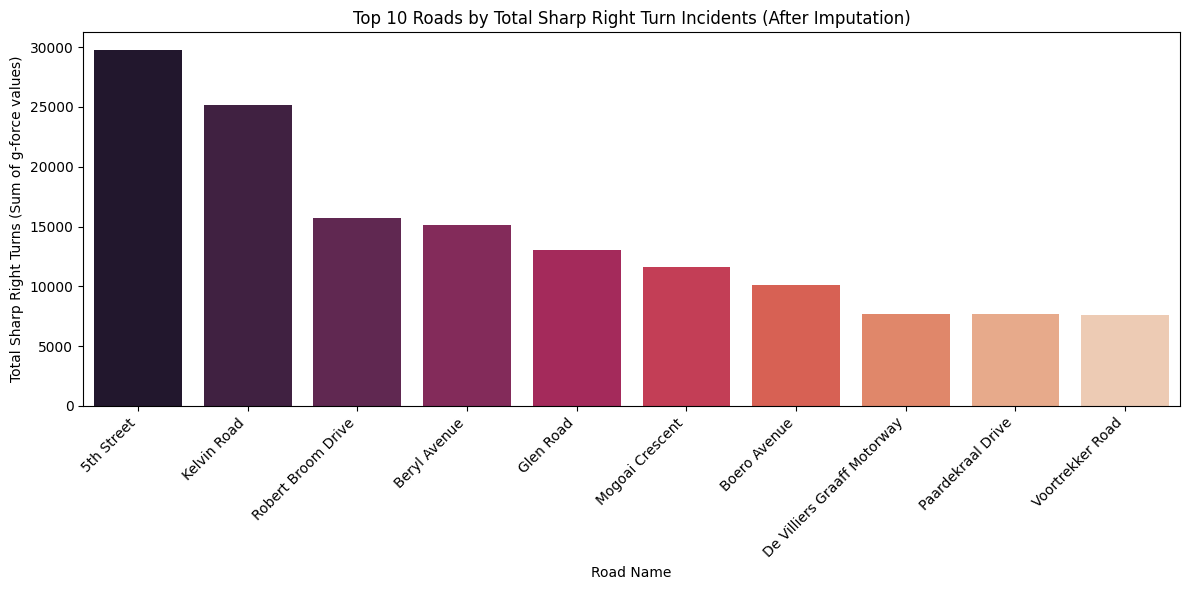

In [163]:
# Group by 'road' and sum the 'sharp_right_turn' values
sharp_right_turn_by_road = df.groupby('road')['sharp_right_turn'].sum().reset_index()

# Sort in descending order to find roads with most sharp right turns, excluding empty road names
top_sharp_right_turn_roads = sharp_right_turn_by_road[sharp_right_turn_by_road['road'] != ''].nlargest(10, 'sharp_right_turn')

plt.figure(figsize=(12, 6))
sns.barplot(x='road', y='sharp_right_turn', data=top_sharp_right_turn_roads, hue='road', palette='rocket', legend=False)
plt.title('Top 10 Roads by Total Sharp Right Turn Incidents (After Imputation)')
plt.xlabel('Road Name')
plt.ylabel('Total Sharp Right Turns (Sum of g-force values)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

where are these roads, the areas

In [164]:
# Combine all top roads from harsh driving incidents
all_top_roads = pd.concat([
    top_harsh_acceleration_roads['road'],
    top_harsh_braking_roads['road'],
    top_sharp_right_turn_roads['road']
]).drop_duplicates().tolist()

# Filter out any empty strings that might have been included
all_top_roads = [road for road in all_top_roads if road != '']

# Create a dictionary to store the most frequent suburb for each road
road_to_suburb = {}

for road_name in all_top_roads:
    # Filter the original DataFrame for the current road
    df_road = df[df['road'] == road_name]
    if not df_road.empty:
        # Get the most frequent suburb for this road
        most_frequent_suburb = df_road['suburb'].mode()[0]
        road_to_suburb[road_name] = most_frequent_suburb

# Display the results
print("Most frequent suburbs for roads with high harsh driving incidents:")
for road, suburb in road_to_suburb.items():
    print(f"Road: '{road}' is most frequently in Suburb: '{suburb}'")

Most frequent suburbs for roads with high harsh driving incidents:
Road: '5th Street' is most frequently in Suburb: 'Wynberg'
Road: '6th Street' is most frequently in Suburb: 'Wynberg'
Road: 'Kelvin Road' is most frequently in Suburb: 'Bramley'
Road: 'Robert Broom Drive' is most frequently in Suburb: 'Rant en Dal'
Road: 'Hendrik Potgieter Road' is most frequently in Suburb: 'Little Falls'
Road: 'Ontdekkers Road' is most frequently in Suburb: 'Florida Park'
Road: 'Glen Road' is most frequently in Suburb: 'Raumarais Park'
Road: 'William Nicol Street N' is most frequently in Suburb: 'Constantia Kloof'
Road: 'Beryl Avenue' is most frequently in Suburb: 'Bramley Park'
Road: 'Voortrekker Road' is most frequently in Suburb: 'Monument'
Road: 'Western Bypass' is most frequently in Suburb: 'Fairland'
Road: 'De Villiers Graaff Motorway' is most frequently in Suburb: 'Barlow Park'
Road: 'Sinqobile Street' is most frequently in Suburb: 'Munsieville'
Road: 'Mogoai Crescent' is most frequently in Sub

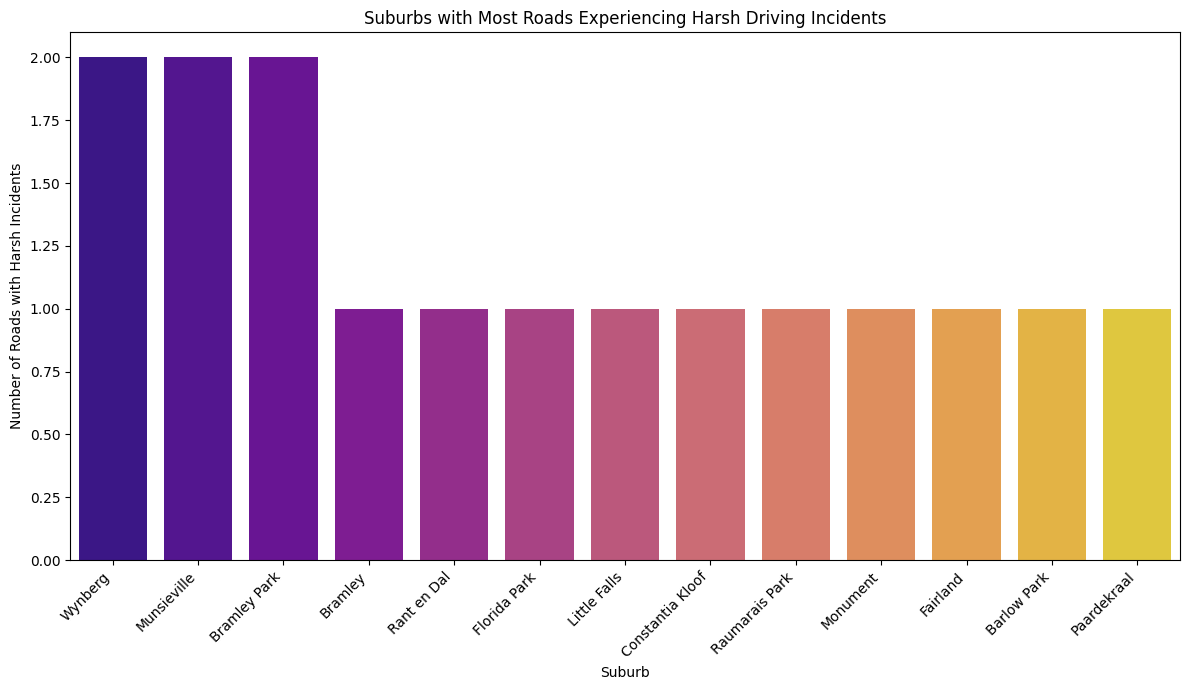

In [165]:
# Create a DataFrame from the road_to_suburb dictionary to count suburb occurrences
suburb_counts_for_harsh_roads = pd.Series(road_to_suburb).value_counts().reset_index()
suburb_counts_for_harsh_roads.columns = ['Suburb', 'Road_Count_with_Harsh_Incidents']

plt.figure(figsize=(12, 7))
sns.barplot(x='Suburb', y='Road_Count_with_Harsh_Incidents', data=suburb_counts_for_harsh_roads, hue='Suburb', palette='plasma', legend=False)
plt.title('Suburbs with Most Roads Experiencing Harsh Driving Incidents')
plt.xlabel('Suburb')
plt.ylabel('Number of Roads with Harsh Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

time and the roads

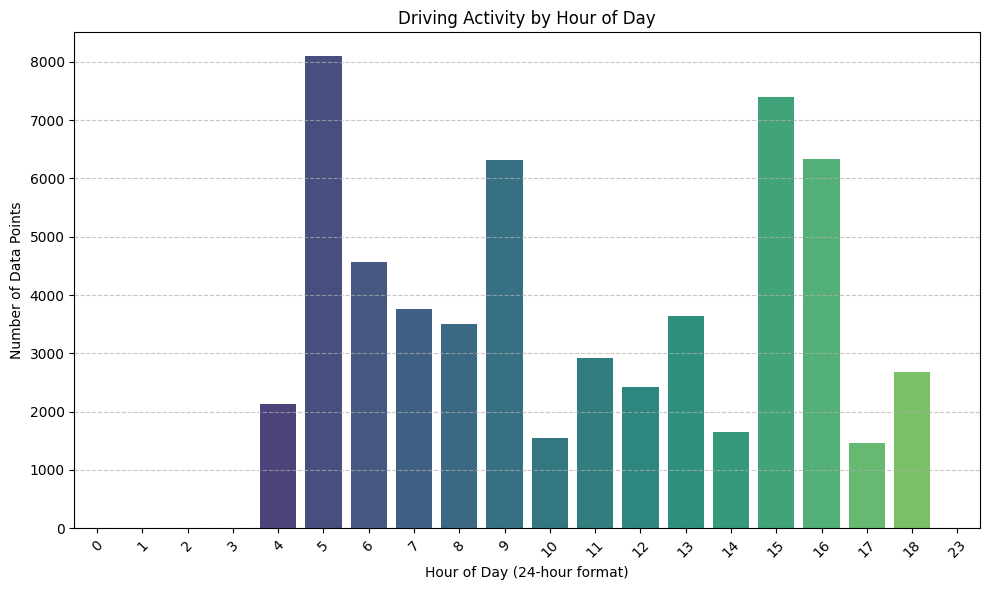

In [166]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hour_of_day', data=df, hue='hour_of_day', palette='viridis', legend=False)
plt.title('Driving Activity by Hour of Day')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

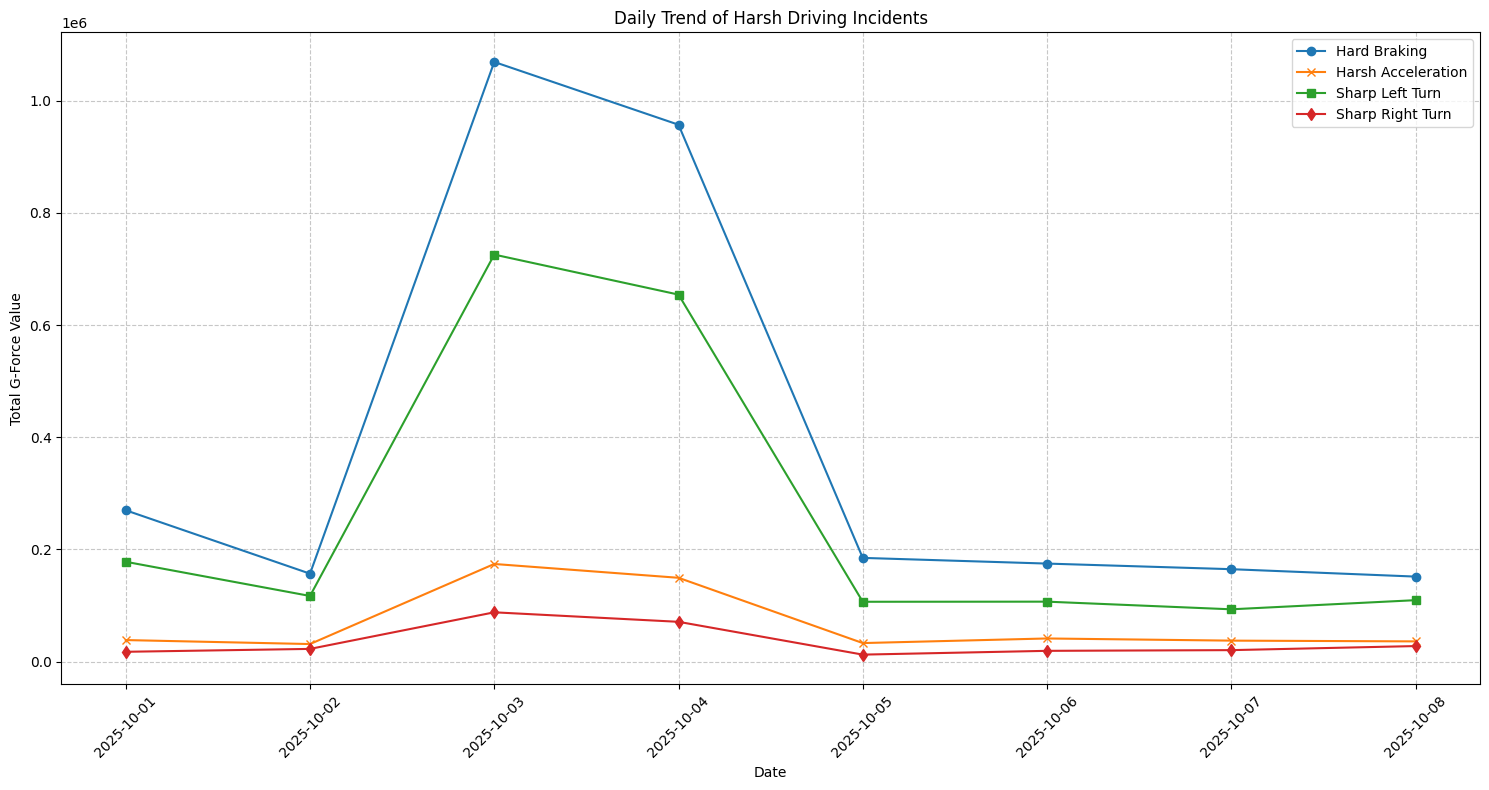

In [167]:
# Extract the date part from unitdatetime
df['date'] = df['unitdatetime'].dt.date

# Group by date and sum the harsh driving metrics
daily_harsh_driving = df.groupby('date')[['hard_braking', 'harsh_acceleration', 'sharp_left_turn', 'sharp_right_turn']].sum().reset_index()

# Convert 'date' column back to datetime for plotting
daily_harsh_driving['date'] = pd.to_datetime(daily_harsh_driving['date'])

plt.figure(figsize=(15, 8))

plt.plot(daily_harsh_driving['date'], daily_harsh_driving['hard_braking'], label='Hard Braking', marker='o', linestyle='-')
plt.plot(daily_harsh_driving['date'], daily_harsh_driving['harsh_acceleration'], label='Harsh Acceleration', marker='x', linestyle='-')
plt.plot(daily_harsh_driving['date'], daily_harsh_driving['sharp_left_turn'], label='Sharp Left Turn', marker='s', linestyle='-')
plt.plot(daily_harsh_driving['date'], daily_harsh_driving['sharp_right_turn'], label='Sharp Right Turn', marker='d', linestyle='-')

plt.title('Daily Trend of Harsh Driving Incidents')
plt.xlabel('Date')
plt.ylabel('Total G-Force Value')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [168]:
import pandas as pd

specific_date = pd.to_datetime('2025-10-03').date()

driver_on_date = df[df['date'] == specific_date]

if not driver_on_date.empty:
    print(f"On {specific_date}, the driver was on the following roads, with their respective data point counts:")
    print(driver_on_date['road'].value_counts())
else:
    print(f"No driving data found for {specific_date}.")

On 2025-10-03, the driver was on the following roads, with their respective data point counts:
road
Western Bypass            3634
Robert Broom Drive        1836
Hendrik Potgieter Road    1309
Ontdekkers Road           1281
Sinqobile Street          1146
                          ... 
Van der Kloof Street         1
Winter Road                  1
Krugerrand Road              1
Arkwright Avenue             1
Rautenbach Avenue            1
Name: count, Length: 92, dtype: int64


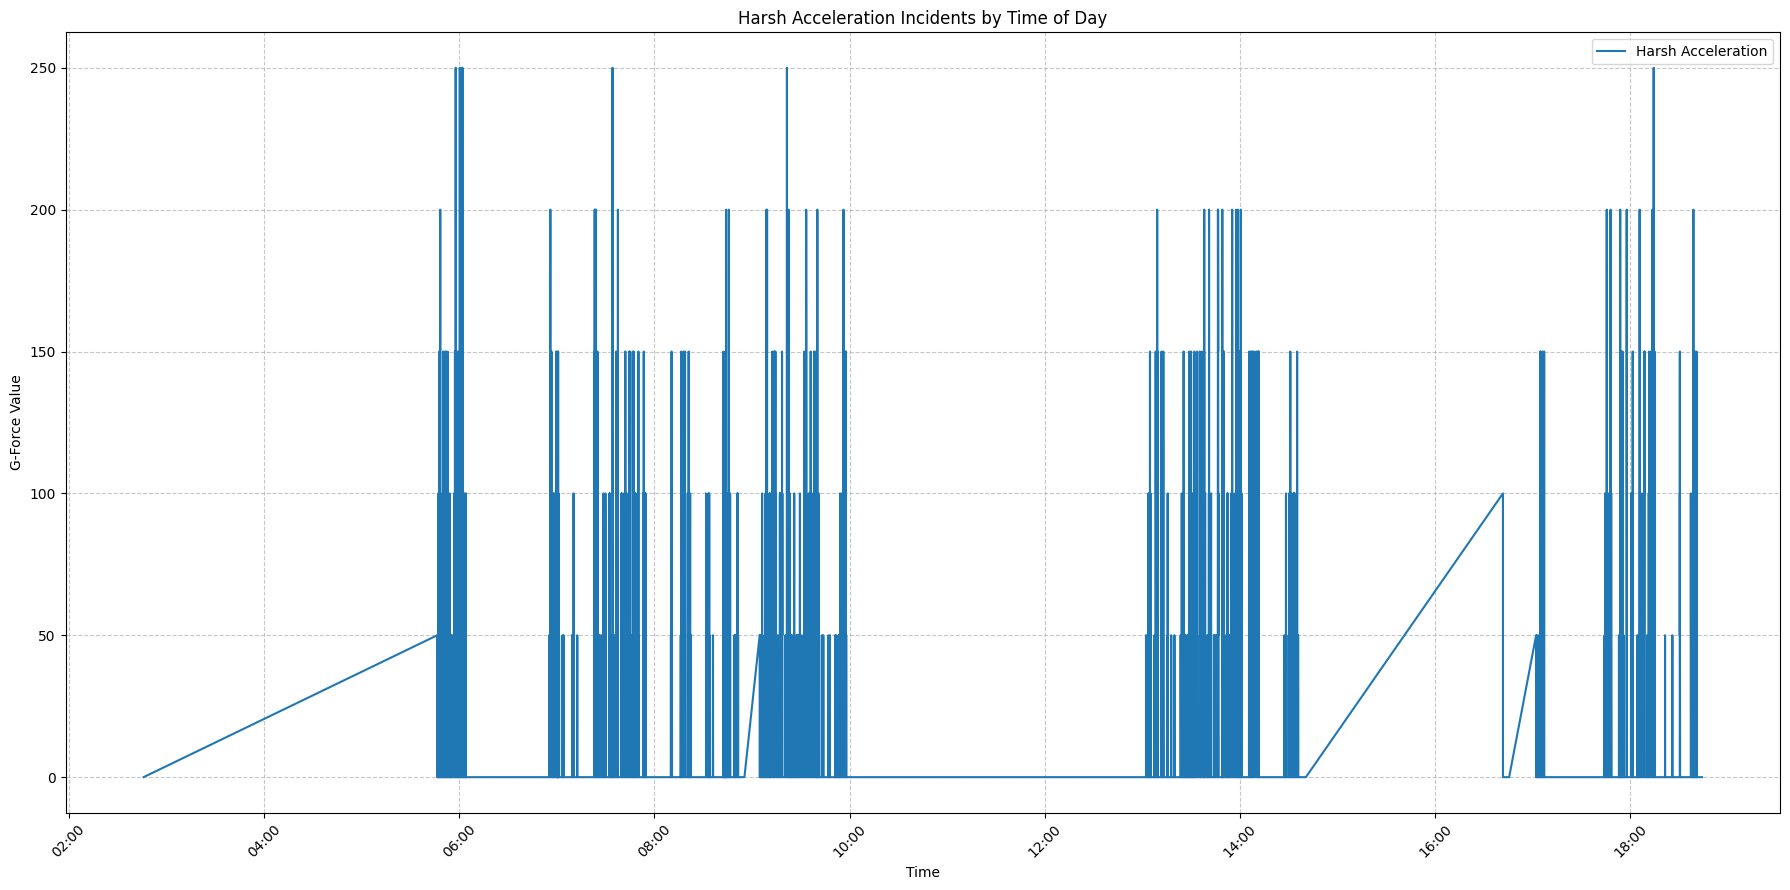

In [169]:
import matplotlib.dates as mdates

specific_date_str = '2025-10-03'
specific_date = pd.to_datetime(specific_date_str).date()

# Filter DataFrame for the specific date
df_single_day = df[df['date'] == specific_date].sort_values(by='unitdatetime')

if not df_single_day.empty:
    plt.figure(figsize=(18, 9))

    plt.plot(df_single_day['unitdatetime'], df_single_day['harsh_acceleration'], label='Harsh Acceleration', marker='', linestyle='-')

    plt.title(f'Harsh Acceleration Incidents by Time of Day')
    plt.xlabel('Time')
    plt.ylabel('G-Force Value')

    # Format x-axis to show 24-hour format (HH:MM)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.xticks(rotation=45)

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print(f"No driving data found for {specific_date_str}.")

In [170]:
specific_date = pd.to_datetime('2025-10-03').date()

hours_of_interest = [8, 14, 18]

for hour in hours_of_interest:
    # Filter data for the specific date and hour
    # We look for entries where the hour_of_day matches and take the first one found
    # This assumes consistent data within the hour or that the first entry is sufficient
    df_at_hour = df[(df['date'] == specific_date) & (df['hour_of_day'] == hour)].head(1)

    if not df_at_hour.empty:
        road = df_at_hour['road'].iloc[0]
        suburb = df_at_hour['suburb'].iloc[0]
        municipality = df_at_hour['municipality'].iloc[0]
        print(f"On {specific_date} at {hour:02d}:00, the driver was on road: '{road}' in suburb: '{suburb}', {municipality}.")
    else:
        print(f"No driving data found for {specific_date} at {hour:02d}:00.")

On 2025-10-03 at 08:00, the driver was on road: 'Sinqobile Street' in suburb: 'Munsieville', West Rand.
On 2025-10-03 at 14:00, the driver was on road: 'Sinqobile Street' in suburb: 'Munsieville', West Rand.
On 2025-10-03 at 18:00, the driver was on road: 'Kelvin Road' in suburb: 'Bramley', City of Johannesburg.


In [171]:
# Calculate speed deviation from the roadspeed limit
df['speed_deviation'] = df['speed'] - df['roadspeed']

# Create a total harshness score by summing g-force values
df['total_harshness'] = df['harsh_acceleration'] + df['hard_braking'] + df['sharp_left_turn'] + df['sharp_right_turn']

print("New features 'speed_deviation' and 'total_harshness' created.")
display(df[['speed', 'roadspeed', 'speed_deviation', 'total_harshness']].head())

New features 'speed_deviation' and 'total_harshness' created.


,speed,roadspeed,speed_deviation,total_harshness
0,0,0,0,50
1,0,0,0,50
2,0,0,0,50
3,0,0,0,50
4,0,0,0,50


Now, let's visualize the relationship between these new features.

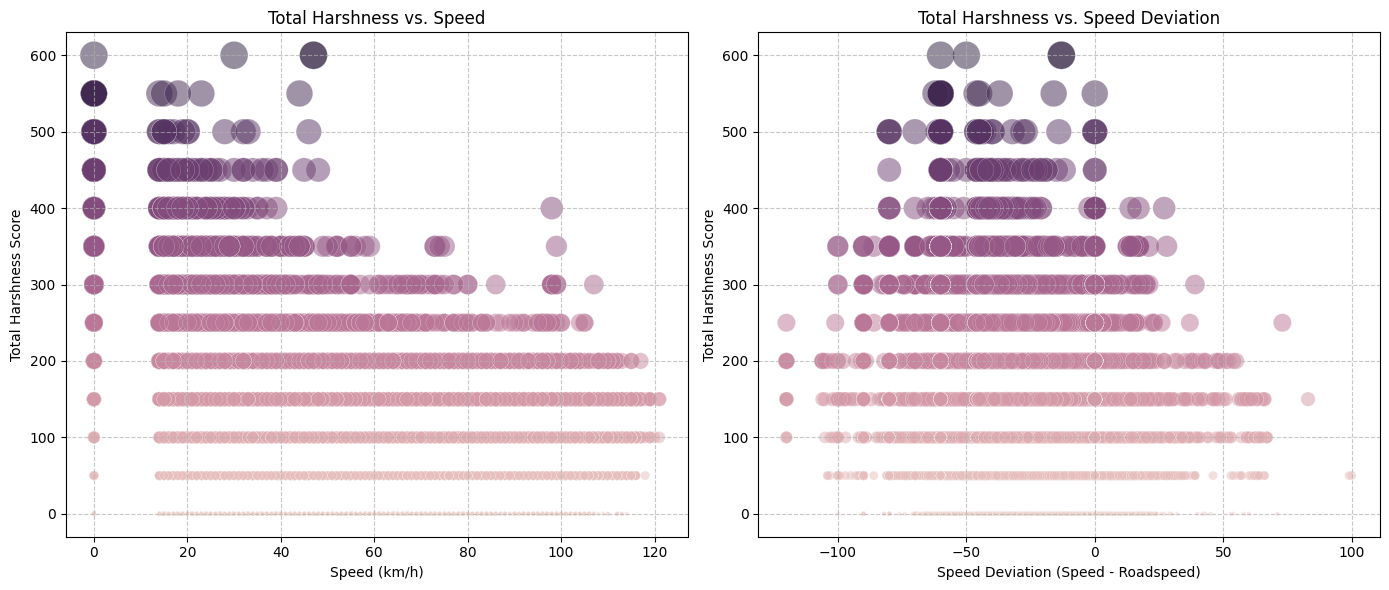

In [172]:
plt.figure(figsize=(14, 6))

# Scatter plot for Total Harshness vs Speed
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.scatterplot(data=df, x='speed', y='total_harshness', alpha=0.5, hue='total_harshness', size='total_harshness', sizes=(10, 400), legend=False)
plt.title('Total Harshness vs. Speed')
plt.xlabel('Speed (km/h)')
plt.ylabel('Total Harshness Score')
plt.grid(True, linestyle='--', alpha=0.7)

# Scatter plot for Total Harshness vs Speed Deviation
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.scatterplot(data=df, x='speed_deviation', y='total_harshness', alpha=0.5, hue='total_harshness', size='total_harshness', sizes=(10, 400), legend=False)
plt.title('Total Harshness vs. Speed Deviation')
plt.xlabel('Speed Deviation (Speed - Roadspeed)')
plt.ylabel('Total Harshness Score')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

otal Harshness vs. Speed Plot:

Concentration at Lower Speeds (around 0-20 km/h): You likely see a high density of points, including some with significant harshness scores, at very low speeds. This indicates that harsh braking and acceleration events often occur when the vehicle is starting, stopping, or navigating slow-moving traffic. This is a common pattern for urban driving.
Harshness at Higher Speeds: While less frequent than at lower speeds, the plot also shows harsh incidents occurring at higher speeds. These might represent sudden braking on highways, sharp maneuvers during faster driving, or rapid acceleration to match traffic flow.
Absence of Harshness at Extreme High Speeds: Typically, there's a drop-off in harshness incidents at the absolute highest speeds recorded. This could be because there's less opportunity for sudden changes in motion when a vehicle is already traveling at its maximum spe

. Total Harshness vs. Speed Deviation Plot:

Concentration around Zero Deviation: A large number of data points, often with lower harshness, will cluster around a speed_deviation of 0. This signifies that the driver often maintains speed close to the posted limit, and most routine driving isn't harsh.
Harshness with Positive Speed Deviation (Speeding): If you observe points with high total_harshness when speed_deviation is significantly positive, it suggests that harsh driving incidents (e.g., rapid braking or acceleration) are occurring while the driver is exceeding the speed limit. This could indicate aggressive driving behavior.
Harshness with Negative Speed Deviation (Below Speed Limit): High harshness scores with negative speed_deviation could point to incidents where the driver is reacting to unexpected events or navigating congested areas where they are forced to brake or accelerate sharply despite being below the posted limit.
Correlation between Harshness and Deviation Extremes: The plots can help you visually determine if there's a stronger correlation between harshness and being significantly over the speed limit versus being significantly under it. This can reveal if aggressive driving or reactive driving is more associated with harsh events.

These scatter plots show the distribution of total harshness against the vehicle's speed and its deviation from the road speed. Look for clusters of high harshness scores at specific speed ranges or deviation values. For example, if harsh incidents are concentrated when `speed_deviation` is positive, it might indicate harsh driving when speeding.

In [173]:
display(df[['unitdatetime', 'hour_of_day', 'day_of_week']].head())

,unitdatetime,hour_of_day,day_of_week
0,2025-10-08 23:24:34,23,Wednesday
1,2025-10-08 15:59:49,15,Wednesday
2,2025-10-08 15:59:50,15,Wednesday
3,2025-10-08 15:59:51,15,Wednesday
4,2025-10-08 15:59:51,15,Wednesday


In [174]:
if 'df' not in locals() and 'df' not in globals():
    print("Error: DataFrame 'df' is not defined. Please ensure the cells loading and preprocessing the dataset are executed.")
else:
    # Check for the literal string '""' as identified in value_counts
    empty_road_entries = df[df['road'] == '""']

    if not empty_road_entries.empty:
        unique_suburbs_for_empty_road = empty_road_entries['suburb'].unique()

        print(f"The road named '""' is found in the following unique suburb(s):\n{unique_suburbs_for_empty_road}")

        if len(unique_suburbs_for_empty_road) == 1:
            print(f"All entries for the road named '""' are indeed in the same suburb: {unique_suburbs_for_empty_road[0]}")
        else:
            print("The entries for the road named '""' are distributed across multiple suburbs.")
    else:
        print("No entries found where the road name is the literal string '""'.")

No entries found where the road name is the literal string ''.


# From here


  # Imports & Globals

In [175]:
# Cell 1: imports and settings
import os
import json
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

import joblib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,5)

RANDOM_STATE = 42
MODEL_DIR = "models"
os.makedirs(MODEL_DIR, exist_ok=True)

# Optional XGBoost
try:
    from xgboost import XGBClassifier
    HAS_XGB = True
except Exception:
    HAS_XGB = False
    print("XGBoost not available — continuing with LogisticRegression and RandomForest only.")


# Safe parsing & quick cleaning

In [176]:
# Cell 3: Feature engineering
def feature_engineer(df):
    df = df.copy()

    # Temporal features
    if 'unitdatetime' in df.columns:
        df['hour_of_day'] = df['unitdatetime'].dt.hour
        df['day_of_week'] = df['unitdatetime'].dt.day_name()

    # Derived features
    df['speed_deviation'] = df['speed'] - df['roadspeed']
    df['total_harshness'] = df['harsh_acceleration'] + df['hard_braking'] + df['sharp_left_turn'] + df['sharp_right_turn']
    df['road_present'] = (~df['road'].isna() & (df['road'] != '')).astype(int)
    df['harsh_count'] = df[['harsh_acceleration','hard_braking','sharp_left_turn','sharp_right_turn']].sum(axis=1)

    return df

df = feature_engineer(df)


# Create / choose target label (hazardous)

In [177]:
# Cell 4: Define features and target
numeric_features = ['speed','roadspeed','speed_deviation','total_harshness',
                    'battery_voltage_value','odometer','latitude','longitude',
                    'harsh_count']
categorical_features = ['hour_of_day','day_of_week','municipality','suburb','town','road_present']

X = df[numeric_features + categorical_features]
y = df['classification']


# Feature engineering & derived features

In [178]:
# Cell 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Select features for modelling

In [179]:
# Cell 6: Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


# Preprocessing pipeline (ColumnTransformer)

In [186]:
# Cell 7: Define model pipelines (RandomForest reduced)
models = {
    "RandomForest": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(
            n_estimators=100,       # fewer trees
            max_depth=10,           # limit depth
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42
        ))
    ]),
    "GradientBoosting": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(n_estimators=200, random_state=42))
    ]),
    "AdaBoost": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', AdaBoostClassifier(n_estimators=200, random_state=42))
    ])
}

# Train / test split

In [187]:
# Cell 8: Train models and evaluate
cv_results = {}

for name, pipeline in models.items():
    print(f"Training and evaluating: {name}")
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)

    n_classes = y_proba.shape[1]

    # Compute ROC-AUC safely for binary and multi-class
    if n_classes == 2:
        roc_auc = roc_auc_score(y_test, y_proba[:,1])
    else:
        y_test_binarized = label_binarize(y_test, classes=pipeline.named_steps['classifier'].classes_)
        roc_auc = roc_auc_score(y_test_binarized, y_proba, average='weighted', multi_class='ovr')

    report = classification_report(y_test, y_pred)

    cv_results[name] = {'pipeline': pipeline, 'roc_auc': roc_auc}

    print(report)
    print(f"ROC-AUC for {name}: {roc_auc:.3f}")
    print("-"*50)


Training and evaluating: RandomForest
              precision    recall  f1-score   support

          10       0.98      1.00      0.99      1000
          20       0.00      0.00      0.00         2
          30       0.99      0.76      0.86       760
          51       0.93      0.96      0.95      2186
          52       0.91      0.77      0.84      1080
          60       0.86      0.97      0.92      4462
          70       1.00      0.86      0.92      2196

    accuracy                           0.92     11686
   macro avg       0.81      0.76      0.78     11686
weighted avg       0.93      0.92      0.92     11686

ROC-AUC for RandomForest: 0.995
--------------------------------------------------
Training and evaluating: GradientBoosting
              precision    recall  f1-score   support

          10       1.00      1.00      1.00      1000
          20       1.00      0.50      0.67         2
          30       0.99      0.98      0.98       760
          51       0.99

# Define model candidates & cross-validate

In [188]:
# Cell 9: Select best model based on ROC-AUC
best_model_name = max(cv_results, key=lambda k: cv_results[k]['roc_auc'])
best_pipeline = cv_results[best_model_name]['pipeline']

print(f"Best model: {best_model_name} with ROC-AUC: {cv_results[best_model_name]['roc_auc']:.3f}")



Best model: GradientBoosting with ROC-AUC: 1.000


In [189]:
# Cell 10: Save best model
joblib.dump(best_pipeline, "models/best_pipeline.joblib")
print("Best pipeline saved to models/best_pipeline.joblib")

Best pipeline saved to models/best_pipeline.joblib
